In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/나눔고딕.ttf').get_name() #한글이 꺠지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

## 1. 데이터 수집

In [7]:
cancer_seoul = pd.read_csv('data/cancer/cancer_seoul.csv', encoding='euc=kr')
cancer_seoul.head()

,자치구,폐암사망자수,폐암사망자수(남자),폐암사망자수(여자),폐암사망률,폐암사망률(남자),폐암사망률(여자),간암사망자수,간암사망자수(남자),간암사망자수(여자),...,대장암사망자수(여자),대장암사망률,대장암사망률(남자),대장암사망률(여자),췌장암사망자수,췌장암사망자수(남자),췌장암사망자수(여자),췌장암사망률,췌장암사망률(남자),췌장암사망률(여자)
0,합계,2810.0,2048.0,762.0,28.9,43.0,15.4,1670.0,1238.0,432.0,...,602.0,14.9,17.8,12.1,964.0,498.0,466.0,9.9,10.4,9.4
1,종로구,50.0,32.0,18.0,33.8,44.0,23.9,34.0,26.0,8.0,...,13.0,23.0,28.8,17.3,18.0,8.0,10.0,12.2,11.0,13.3
2,중구,40.0,30.0,10.0,33.0,50.1,16.4,24.0,21.0,3.0,...,11.0,20.7,23.4,18.0,21.0,14.0,7.0,17.3,23.4,11.5
3,용산구,82.0,61.0,21.0,37.3,57.2,18.6,43.0,28.0,15.0,...,14.0,15.0,17.8,12.4,28.0,12.0,16.0,12.8,11.2,14.2
4,성동구,93.0,73.0,20.0,31.4,49.8,13.3,59.0,38.0,21.0,...,17.0,13.1,15.0,11.3,29.0,19.0,10.0,9.8,13.0,6.7


In [8]:
drink_smoke = pd.read_csv('data/cancer/drink_smoke_seoul.csv', encoding='euc=kr')
drink_smoke

,구분,음주율,남자음주율,여자음주율,흡연율,남자흡연율,여자흡연율
0,종로구,13.8,23.3,4.7,16.5,31.1,2.5
1,중구,11.1,18.0,4.4,19.1,35.6,3.1
2,용산구,11.8,19.3,4.9,19.7,36.6,4.2
3,성동구,14.4,24.5,4.6,19.2,36.0,2.9
4,광진구,10.5,15.4,5.9,18.0,33.4,3.5
5,동대문구,17.7,26.9,8.6,22.4,39.6,5.3
6,중랑구,16.8,26.9,7.0,23.0,42.2,4.2
7,성북구,15.3,26.0,5.4,18.5,34.4,3.7
8,강북구,15.2,23.5,7.4,22.9,41.5,5.2
9,도봉구,14.2,22.4,6.4,21.2,38.7,4.6


## 2. EDA와 전처리

### 암 데이터

In [9]:
# 자치구 구별로 수정
cancer_seoul.rename(columns={cancer_seoul.columns[0]:"구별"}, inplace=True)
cancer_seoul

# 필요없는 행 삭제 (합계 삭제)
cancer_seoul.drop([0], inplace=True)
cancer_seoul.head()

,구별,폐암사망자수,폐암사망자수(남자),폐암사망자수(여자),폐암사망률,폐암사망률(남자),폐암사망률(여자),간암사망자수,간암사망자수(남자),간암사망자수(여자),...,대장암사망자수(여자),대장암사망률,대장암사망률(남자),대장암사망률(여자),췌장암사망자수,췌장암사망자수(남자),췌장암사망자수(여자),췌장암사망률,췌장암사망률(남자),췌장암사망률(여자)
1,종로구,50.0,32.0,18.0,33.8,44.0,23.9,34.0,26.0,8.0,...,13.0,23.0,28.8,17.3,18.0,8.0,10.0,12.2,11.0,13.3
2,중구,40.0,30.0,10.0,33.0,50.1,16.4,24.0,21.0,3.0,...,11.0,20.7,23.4,18.0,21.0,14.0,7.0,17.3,23.4,11.5
3,용산구,82.0,61.0,21.0,37.3,57.2,18.6,43.0,28.0,15.0,...,14.0,15.0,17.8,12.4,28.0,12.0,16.0,12.8,11.2,14.2
4,성동구,93.0,73.0,20.0,31.4,49.8,13.3,59.0,38.0,21.0,...,17.0,13.1,15.0,11.3,29.0,19.0,10.0,9.8,13.0,6.7
5,광진구,80.0,59.0,21.0,22.7,34.4,11.7,57.0,49.0,8.0,...,19.0,15.9,21.5,10.5,28.0,15.0,13.0,8.0,8.7,7.2


In [10]:
# 구별 데이터의 중복이나 결측치 등을 확인
cancer_seoul["구별"].unique()
cancer_seoul[cancer_seoul["구별"].isnull()]

# 구별 컬럼을 인덱스로 변경
cancer_seoul.set_index("구별", inplace=True)
cancer_seoul.head()

,폐암사망자수,폐암사망자수(남자),폐암사망자수(여자),폐암사망률,폐암사망률(남자),폐암사망률(여자),간암사망자수,간암사망자수(남자),간암사망자수(여자),간암사망률,...,대장암사망자수(여자),대장암사망률,대장암사망률(남자),대장암사망률(여자),췌장암사망자수,췌장암사망자수(남자),췌장암사망자수(여자),췌장암사망률,췌장암사망률(남자),췌장암사망률(여자)
구별,,,,,,,,,,,,,,,,,,,,,
종로구,50.0,32.0,18.0,33.8,44.0,23.9,34.0,26.0,8.0,23.0,...,13.0,23.0,28.8,17.3,18.0,8.0,10.0,12.2,11.0,13.3
중구,40.0,30.0,10.0,33.0,50.1,16.4,24.0,21.0,3.0,19.8,...,11.0,20.7,23.4,18.0,21.0,14.0,7.0,17.3,23.4,11.5
용산구,82.0,61.0,21.0,37.3,57.2,18.6,43.0,28.0,15.0,19.6,...,14.0,15.0,17.8,12.4,28.0,12.0,16.0,12.8,11.2,14.2
성동구,93.0,73.0,20.0,31.4,49.8,13.3,59.0,38.0,21.0,19.9,...,17.0,13.1,15.0,11.3,29.0,19.0,10.0,9.8,13.0,6.7
광진구,80.0,59.0,21.0,22.7,34.4,11.7,57.0,49.0,8.0,16.2,...,19.0,15.9,21.5,10.5,28.0,15.0,13.0,8.0,8.7,7.2


In [11]:
cancer_seoul.dtypes

폐암사망자수         float64
폐암사망자수(남자)     float64
폐암사망자수(여자)     float64
폐암사망률          float64
폐암사망률(남자)      float64
폐암사망률(여자)      float64
간암사망자수         float64
간암사망자수(남자)     float64
간암사망자수(여자)     float64
간암사망률          float64
간암사망률(남자)      float64
간암사망률(여자)      float64
위암사망자수         float64
위암사망자수(남자)     float64
위암사망자수(여자)     float64
위암사망률          float64
위암사망률(남자)      float64
위암사망률(여자)      float64
대장암사망자수        float64
대장암사망자수(남자)    float64
대장암사망자수(여자)    float64
대장암사망률         float64
대장암사망률(남자)     float64
대장암사망률(여자)     float64
췌장암사망자수        float64
췌장암사망자수(남자)    float64
췌장암사망자수(여자)    float64
췌장암사망률         float64
췌장암사망률(남자)     float64
췌장암사망률(여자)     float64
dtype: object

#### 사망자수가 많은 구별로 그래프 그리기

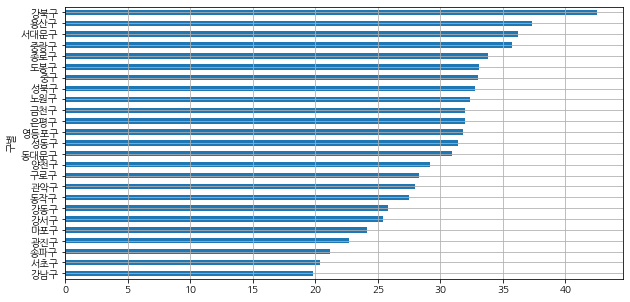

In [173]:
# 폐암사망률이 가장 높은 구는?
cancer_seoul["폐암사망률"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 강북구, 용산구, 서대문구

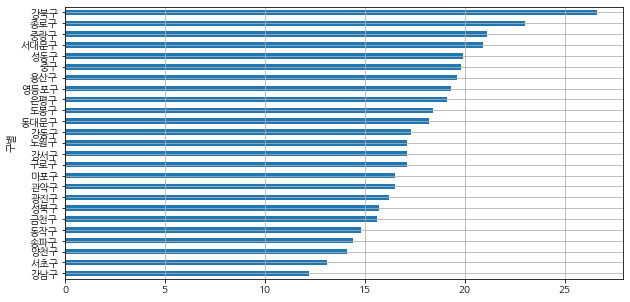

In [89]:
# 간암사망률이 가장 높은 구는?
cancer_seoul["간암사망률"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 강북구, 종로구, 중랑구

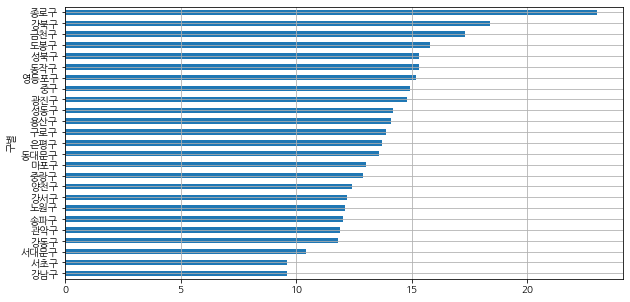

In [90]:
# 위암사망률이 가장 높은 구는?
cancer_seoul["위암사망률"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 종로구, 강북구, 금천구

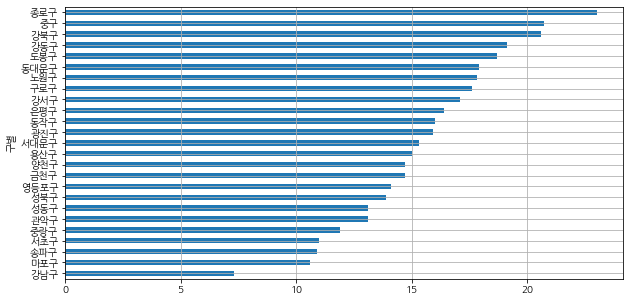

In [91]:
# 대장암사망률이 가장 높은 구는?
cancer_seoul["대장암사망률"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 종로구, 중구, 강북구

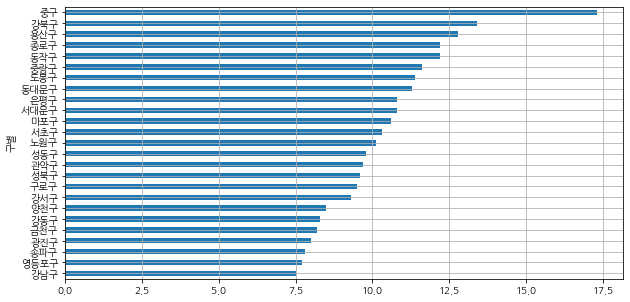

In [92]:
# 췌장암사망률이 가장 높은 구는?
cancer_seoul["췌장암사망률"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 중구, 강북구, 용산구

In [13]:
# 전체 사망률을 계산 해 사망률 column생성
cancer_seoul['사망률'] = (cancer_seoul['폐암사망률']+cancer_seoul['간암사망률']+cancer_seoul['위암사망률']+cancer_seoul['대장암사망률']+cancer_seoul['췌장암사망률'])/5
cancer_seoul.head()

,폐암사망자수,폐암사망자수(남자),폐암사망자수(여자),폐암사망률,폐암사망률(남자),폐암사망률(여자),간암사망자수,간암사망자수(남자),간암사망자수(여자),간암사망률,...,대장암사망률,대장암사망률(남자),대장암사망률(여자),췌장암사망자수,췌장암사망자수(남자),췌장암사망자수(여자),췌장암사망률,췌장암사망률(남자),췌장암사망률(여자),사망률
구별,,,,,,,,,,,,,,,,,,,,,
종로구,50.0,32.0,18.0,33.8,44.0,23.9,34.0,26.0,8.0,23.0,...,23.0,28.8,17.3,18.0,8.0,10.0,12.2,11.0,13.3,23.00
중구,40.0,30.0,10.0,33.0,50.1,16.4,24.0,21.0,3.0,19.8,...,20.7,23.4,18.0,21.0,14.0,7.0,17.3,23.4,11.5,21.14
용산구,82.0,61.0,21.0,37.3,57.2,18.6,43.0,28.0,15.0,19.6,...,15.0,17.8,12.4,28.0,12.0,16.0,12.8,11.2,14.2,19.76
성동구,93.0,73.0,20.0,31.4,49.8,13.3,59.0,38.0,21.0,19.9,...,13.1,15.0,11.3,29.0,19.0,10.0,9.8,13.0,6.7,17.68
광진구,80.0,59.0,21.0,22.7,34.4,11.7,57.0,49.0,8.0,16.2,...,15.9,21.5,10.5,28.0,15.0,13.0,8.0,8.7,7.2,15.52


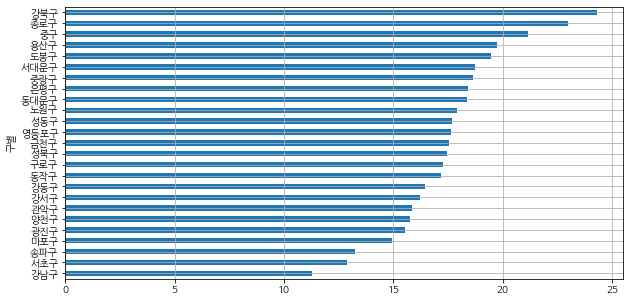

In [14]:
# 전체 사망률이 가장 높은 구는?
cancer_seoul["사망률"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)
# 강북구, 종로구, 중구

---
#### 성별 암 사망자수 그래프 구하기

In [15]:
# 성별 폐암 데이터프레임
cancer_sex = cancer_seoul.drop(cancer_seoul.columns[[0,1,2,3,6,7,8,9,12,13,14,15,18,19,20,21,24,25,26,27,30]], axis='columns')
cancer_sex.head()

,폐암사망률(남자),폐암사망률(여자),간암사망률(남자),간암사망률(여자),위암사망률(남자),위암사망률(여자),대장암사망률(남자),대장암사망률(여자),췌장암사망률(남자),췌장암사망률(여자)
구별,,,,,,,,,,
종로구,44.0,23.9,35.7,10.6,30.2,15.9,28.8,17.3,11.0,13.3
중구,50.1,16.4,35.0,4.9,26.7,3.3,23.4,18.0,23.4,11.5
용산구,57.2,18.6,26.2,13.3,20.6,8.0,17.8,12.4,11.2,14.2
성동구,49.8,13.3,25.9,14.0,17.7,10.7,15.0,11.3,13.0,6.7
광진구,34.4,11.7,28.5,4.4,19.2,10.5,21.5,10.5,8.7,7.2


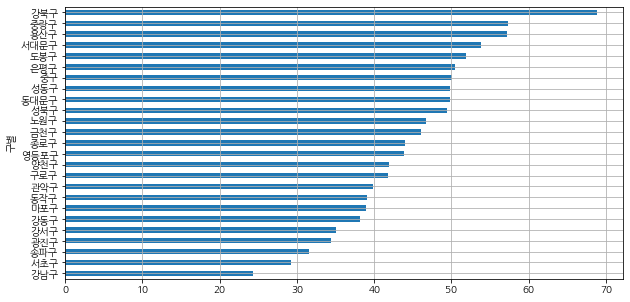

In [16]:
# 남자 중 폐암사망률이 가장 높은 구는?
cancer_sex["폐암사망률(남자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 강북구 중랑구 용산구

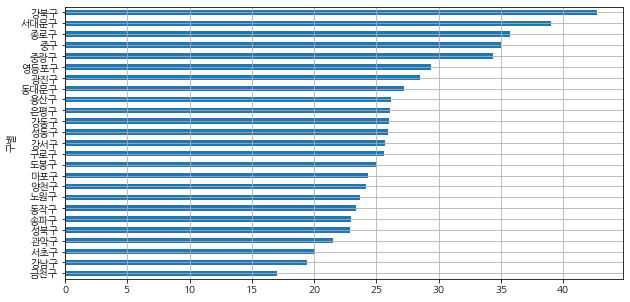

In [179]:
# 남자 중 간암사망률이 가장 높은 구는?
cancer_sex["간암사망률(남자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 강북구 서대문구 종로구

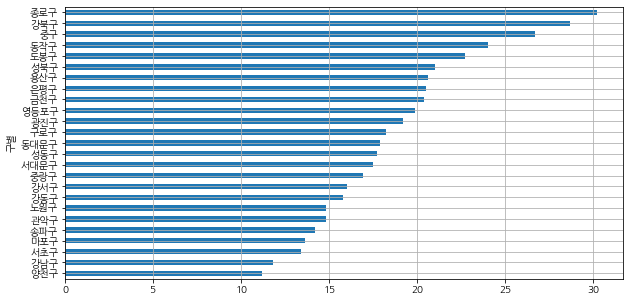

In [180]:
# 남자 중 위암사망률이 가장 높은 구는?
cancer_sex["위암사망률(남자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 종로구 강북구 중구

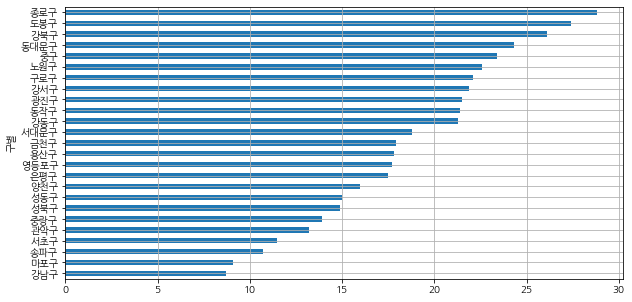

In [181]:
# 남자 중 대장암사망률이 가장 높은 구는?
cancer_sex["대장암사망률(남자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 종로구 도봉구 강북구

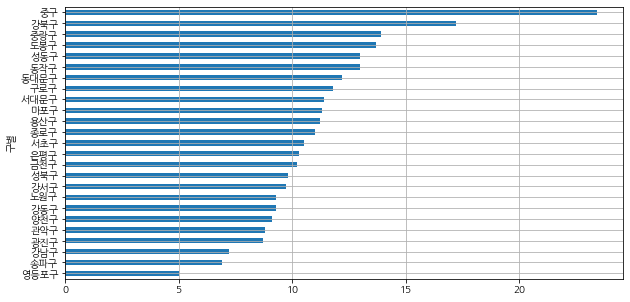

In [182]:
# 남자 중 췌장암사망률이 가장 높은 구는?
cancer_sex["췌장암사망률(남자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 중구 강북구 중랑구

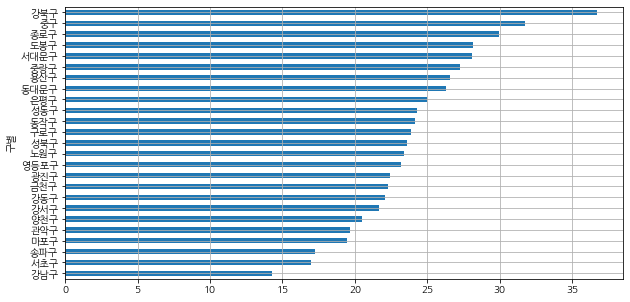

In [17]:
# 전체 사망률이 가장 높은 구는?
cancer_sex['사망률(남자)'] = (cancer_sex['폐암사망률(남자)']+cancer_sex['간암사망률(남자)']+cancer_sex['위암사망률(남자)']+cancer_sex['대장암사망률(남자)']+cancer_sex['췌장암사망률(남자)'])/5
cancer_sex.head()

cancer_sex["사망률(남자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)
# 강북구 중구 종로구

---

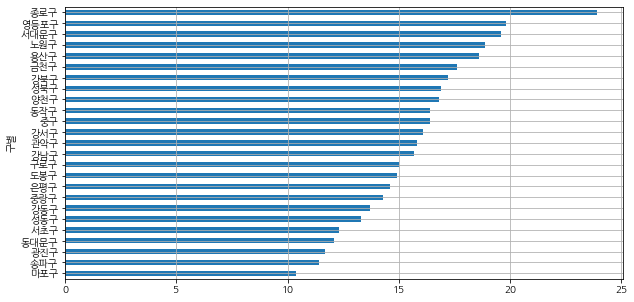

In [184]:
# 여자 중 폐암사망률이 가장 높은 구는?
cancer_sex["폐암사망률(여자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 종로구 영등포구 서대문구

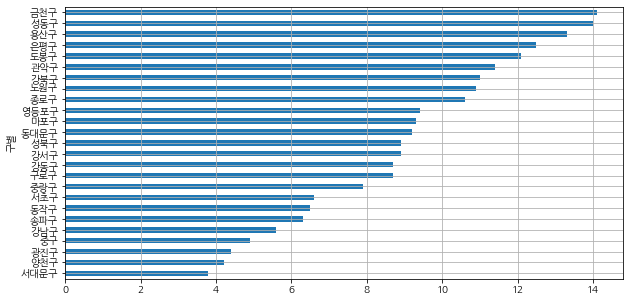

In [185]:
# 여자 중 간암사망률이 가장 높은 구는?
cancer_sex["간암사망률(여자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 금천구 성동구 용산구

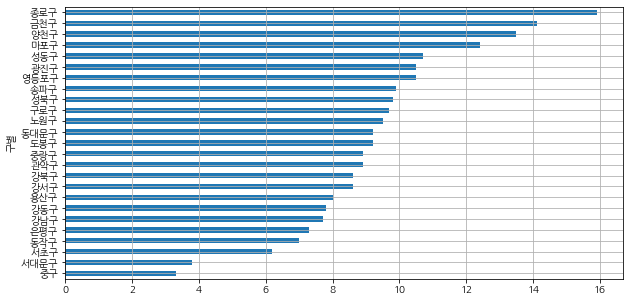

In [186]:
# 여자 중 위암사망률이 가장 높은 구는?
cancer_sex["위암사망률(여자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 종로구 금천구 양천구

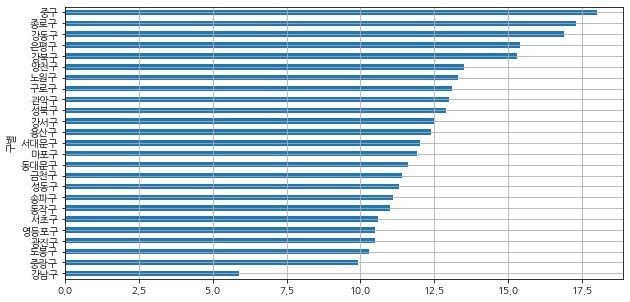

In [187]:
# 여자 중 대장암사망률이 가장 높은 구는?
cancer_sex["대장암사망률(여자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 중구 종로구 강동구

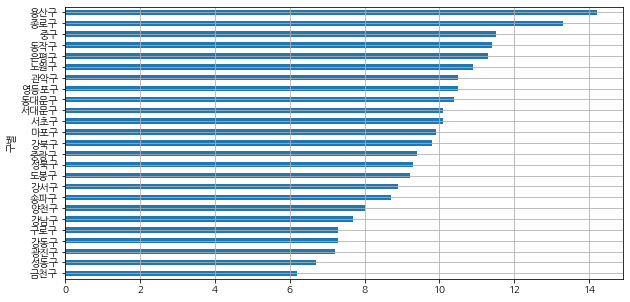

In [188]:
# 여자 중 췌장암사망률이 가장 높은 구는?
cancer_sex["췌장암사망률(여자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 용산구 종로구 중구

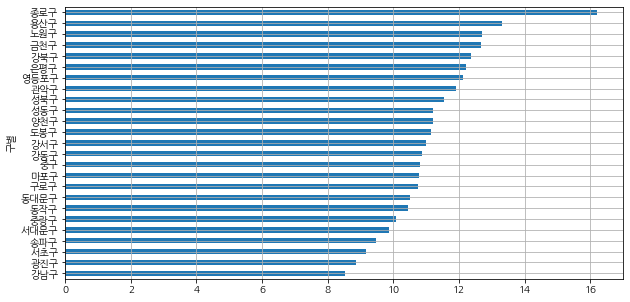

In [243]:
# 전체 사망률이 가장 높은 구는?
cancer_sex['사망률(여자)'] = (cancer_sex['폐암사망률(여자)']+cancer_sex['간암사망률(여자)']+cancer_sex['위암사망률(여자)']+cancer_sex['대장암사망률(여자)']+cancer_sex['췌장암사망률(여자)'])/5
cancer_sex.head()

cancer_sex["사망률(여자)"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)
# 종로구 용산구 노원구

### 음주 흡연 데이터

In [18]:
# 자치구 구별로 수정
drink_smoke.rename(columns={drink_smoke.columns[0]:"구별"}, inplace=True)
drink_smoke

,구별,음주율,남자음주율,여자음주율,흡연율,남자흡연율,여자흡연율
0,종로구,13.8,23.3,4.7,16.5,31.1,2.5
1,중구,11.1,18.0,4.4,19.1,35.6,3.1
2,용산구,11.8,19.3,4.9,19.7,36.6,4.2
3,성동구,14.4,24.5,4.6,19.2,36.0,2.9
4,광진구,10.5,15.4,5.9,18.0,33.4,3.5
5,동대문구,17.7,26.9,8.6,22.4,39.6,5.3
6,중랑구,16.8,26.9,7.0,23.0,42.2,4.2
7,성북구,15.3,26.0,5.4,18.5,34.4,3.7
8,강북구,15.2,23.5,7.4,22.9,41.5,5.2
9,도봉구,14.2,22.4,6.4,21.2,38.7,4.6


In [19]:
# 여자 흡연율의 결측치 F 처리 (평균값)
drink_smoke.replace('F','0',inplace=True)

# 여자흡연율의 type 변경 (object -> float)
drink_smoke = drink_smoke.astype({'여자흡연율':'float64'})
drink_smoke.dtypes

F_smoke = round(np.mean(drink_smoke['여자흡연율']),1)
drink_smoke.replace(0,F_smoke,inplace=True)

In [20]:
# 구별 컬럼을 인덱스로 변경
drink_smoke.set_index("구별", inplace=True)
drink_smoke.head()

,음주율,남자음주율,여자음주율,흡연율,남자흡연율,여자흡연율
구별,,,,,,
종로구,13.8,23.3,4.7,16.5,31.1,2.5
중구,11.1,18.0,4.4,19.1,35.6,3.1
용산구,11.8,19.3,4.9,19.7,36.6,4.2
성동구,14.4,24.5,4.6,19.2,36.0,2.9
광진구,10.5,15.4,5.9,18.0,33.4,3.5


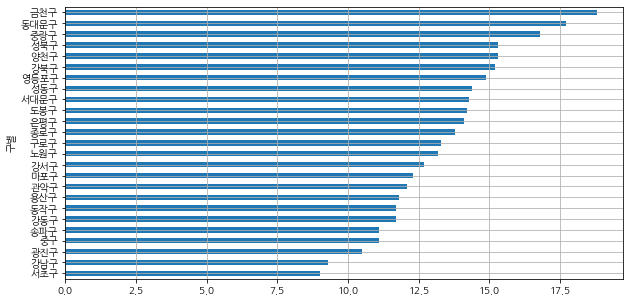

In [19]:
# 음주율이 가장 높은 구는?
drink_smoke["음주율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 금천구 동대문구 중랑구

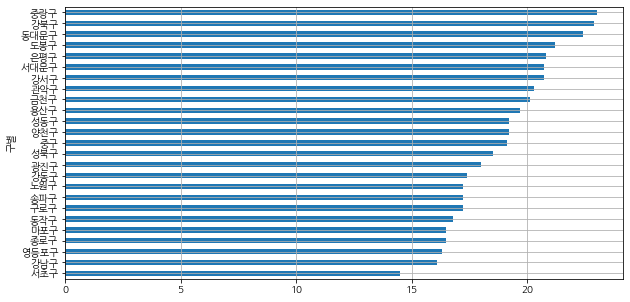

In [20]:
# 흡연율이 가장 높은 구는?
drink_smoke["흡연율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 중랑구 강북구 동대문구

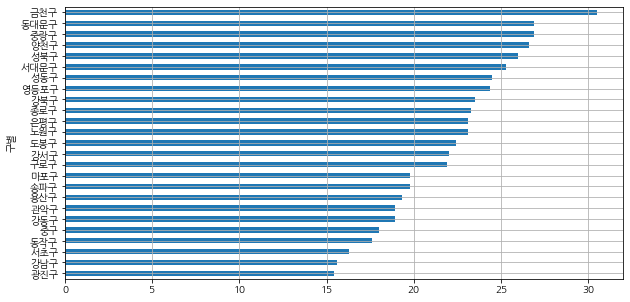

In [46]:
# 남자음주율이 가장 높은 구는?
drink_smoke["남자음주율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 금천구 동대문구 중랑구

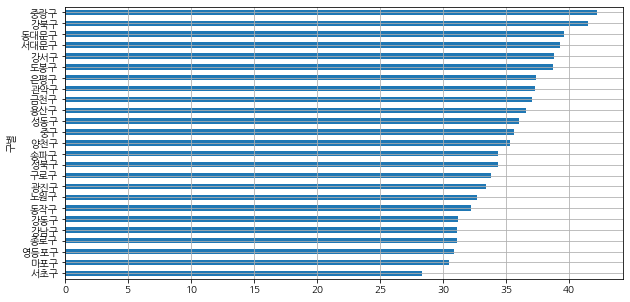

In [47]:
# 남자흡연율이 가장 높은 구는?
drink_smoke["남자흡연율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 중랑구 강북구 동대문구

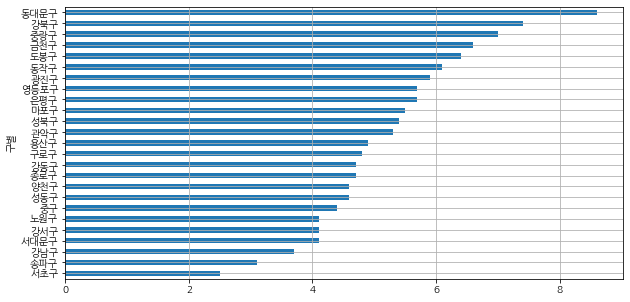

In [48]:
# 여자음주율이 가장 높은 구는?
drink_smoke["여자음주율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 동대문구 강북구 중랑구

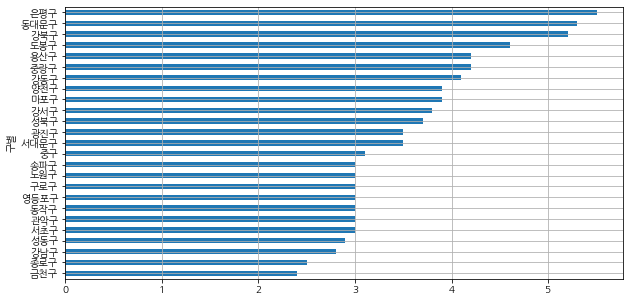

In [85]:
# 여자흡연율이 가장 높은 구는?
drink_smoke["여자흡연율"].sort_values().plot(kind="barh", figsize=(10, 5), grid=True)

# 은평구 동대문구 강북구

---
## 3. 데이터분석 및 시각화

#### 1) 암 사망률과의 관계

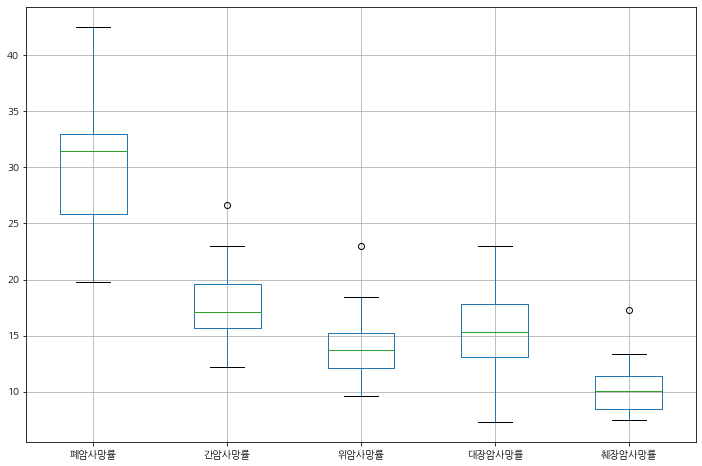

In [215]:
# 암 사망률
cancer_seoul.boxplot(column=['폐암사망률','간암사망률','위암사망률','대장암사망률','췌장암사망률'], figsize=(12,8))

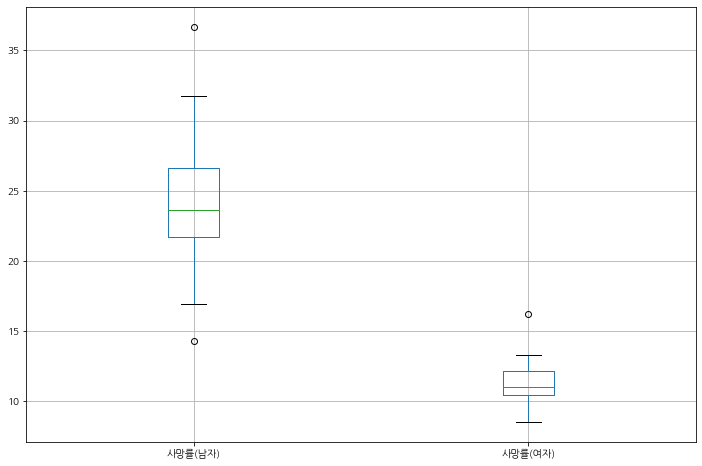

In [191]:
# 성별과 암사망률
cancer_sex.boxplot(column=['사망률(남자)','사망률(여자)'], figsize=(12,8))

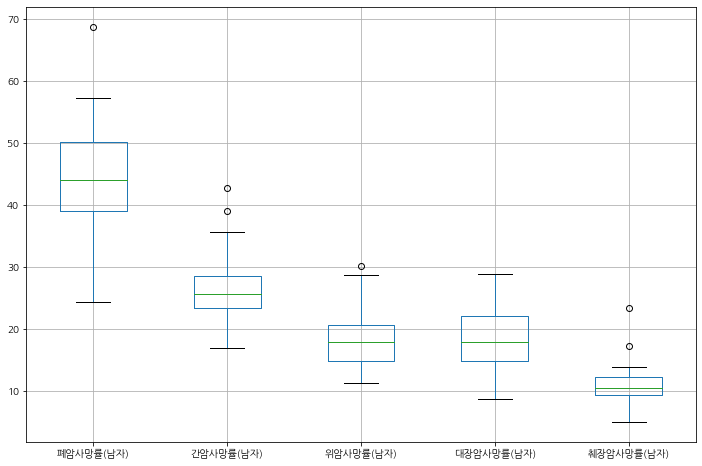

In [217]:
# 남자 암사망률
cancer_sex.boxplot(column=['폐암사망률(남자)','간암사망률(남자)','위암사망률(남자)','대장암사망률(남자)','췌장암사망률(남자)'], figsize=(12,8))

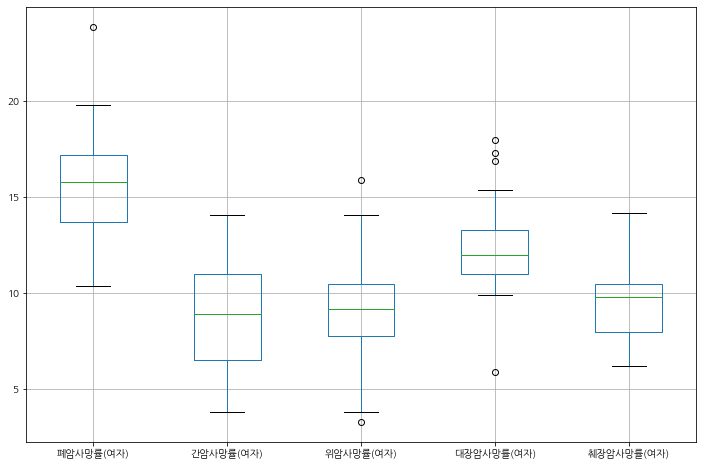

In [218]:
# 여자 암 사망률
cancer_sex.boxplot(column=['폐암사망률(여자)','간암사망률(여자)','위암사망률(여자)','대장암사망률(여자)','췌장암사망률(여자)'], figsize=(12,8))

In [21]:
cc_sort = cancer_seoul.sort_values(by='사망률', ascending=False)
cc_sort.head()

,폐암사망자수,폐암사망자수(남자),폐암사망자수(여자),폐암사망률,폐암사망률(남자),폐암사망률(여자),간암사망자수,간암사망자수(남자),간암사망자수(여자),간암사망률,...,대장암사망률,대장암사망률(남자),대장암사망률(여자),췌장암사망자수,췌장암사망자수(남자),췌장암사망자수(여자),췌장암사망률,췌장암사망률(남자),췌장암사망률(여자),사망률
구별,,,,,,,,,,,,,,,,,,,,,
강북구,136.0,108.0,28.0,42.5,68.8,17.2,85.0,67.0,18.0,26.6,...,20.6,26.1,15.3,43.0,27.0,16.0,13.4,17.2,9.8,24.30
종로구,50.0,32.0,18.0,33.8,44.0,23.9,34.0,26.0,8.0,23.0,...,23.0,28.8,17.3,18.0,8.0,10.0,12.2,11.0,13.3,23.00
중구,40.0,30.0,10.0,33.0,50.1,16.4,24.0,21.0,3.0,19.8,...,20.7,23.4,18.0,21.0,14.0,7.0,17.3,23.4,11.5,21.14
용산구,82.0,61.0,21.0,37.3,57.2,18.6,43.0,28.0,15.0,19.6,...,15.0,17.8,12.4,28.0,12.0,16.0,12.8,11.2,14.2,19.76
도봉구,113.0,87.0,26.0,33.1,51.9,14.9,63.0,42.0,21.0,18.4,...,18.7,27.4,10.3,39.0,23.0,16.0,11.4,13.7,9.2,19.48


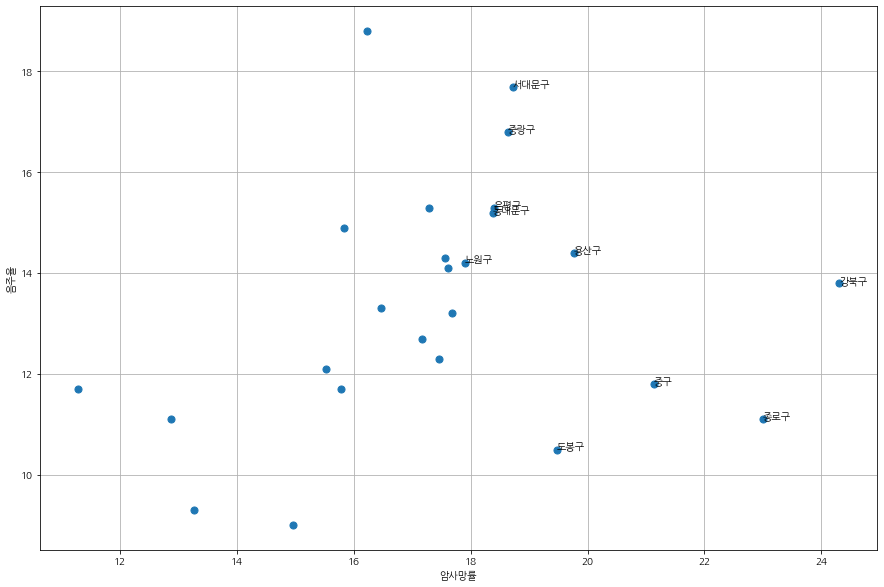

In [203]:
# 암사망률과 음주율의 산점도
plt.figure(figsize=(15, 10))
plt.scatter(cc_sort["사망률"], drink_smoke["음주율"], s=50)
plt.xlabel("암사망률")
plt.ylabel("음주율")
plt.grid()


for n in range(10):
    plt.text(cc_sort["사망률"][n], drink_smoke["음주율"][n], cc_sort.index[n], 
             fontsize=10)

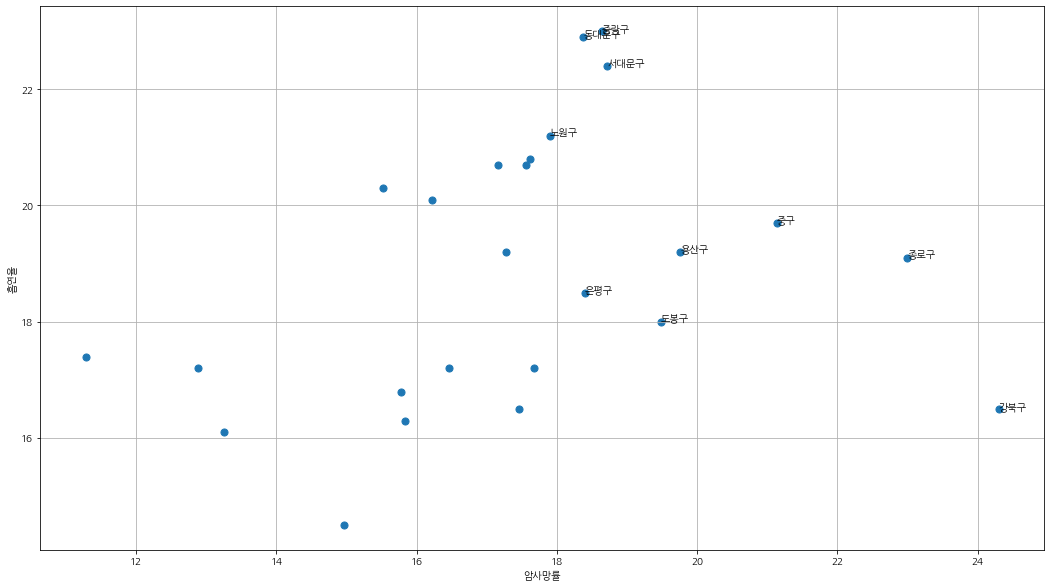

In [207]:
# 암사망률과 흡연율의 산점도
plt.figure(figsize=(18, 10))
plt.scatter(cc_sort["사망률"], drink_smoke["흡연율"], s=50)
plt.xlabel("암사망률")
plt.ylabel("흡연율")
plt.grid()

for n in range(10):
    plt.text(cc_sort["사망률"][n], drink_smoke["흡연율"][n], cc_sort.index[n], 
             fontsize=10)

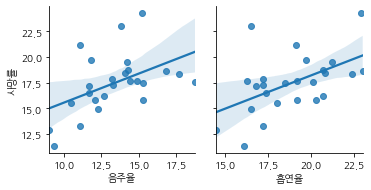

In [248]:
# 암과 음주 흡연 사이의 상관관계
cancer_seoul[['음주율','흡연율']] = drink_smoke[['음주율','흡연율']]
cancer_seoul.head()

sns.pairplot(cancer_seoul, x_vars=['음주율','흡연율'],
            y_vars=['사망률'],
            kind='reg')

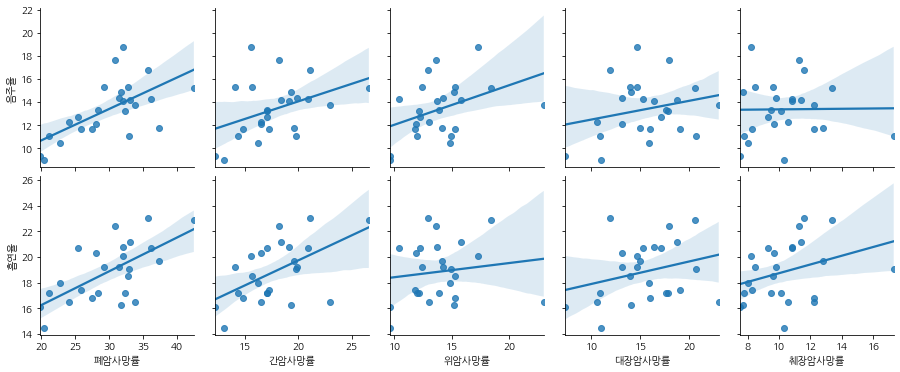

In [249]:
sns.pairplot(cancer_seoul, y_vars=['음주율','흡연율'],
            x_vars=['폐암사망률','간암사망률','위암사망률','대장암사망률','췌장암사망률'],
            kind='reg')

#### 2) 성별에 따른 관계

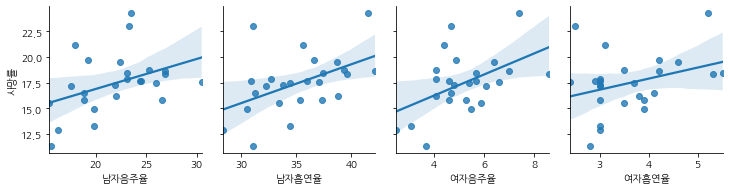

In [250]:
cancer_sex[['남자음주율','남자흡연율','여자음주율','여자흡연율']] = drink_smoke[['남자음주율','남자흡연율','여자음주율','여자흡연율']]
cancer_sex.head()

cancer_sex[['사망률']] = cancer_seoul[['사망률']]

sns.pairplot(cancer_sex, x_vars=['남자음주율','남자흡연율','여자음주율','여자흡연율'],
            y_vars=['사망률'],
            kind='reg')

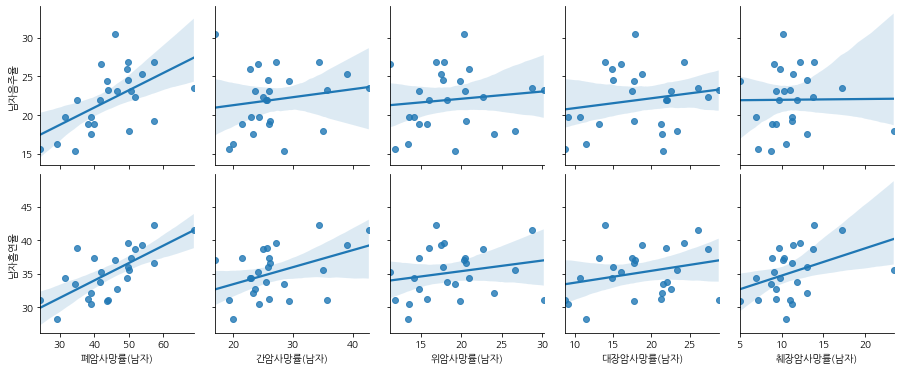

In [251]:
sns.pairplot(cancer_sex, y_vars=['남자음주율','남자흡연율'],
            x_vars=['폐암사망률(남자)','간암사망률(남자)','위암사망률(남자)','대장암사망률(남자)','췌장암사망률(남자)'],
            kind='reg')

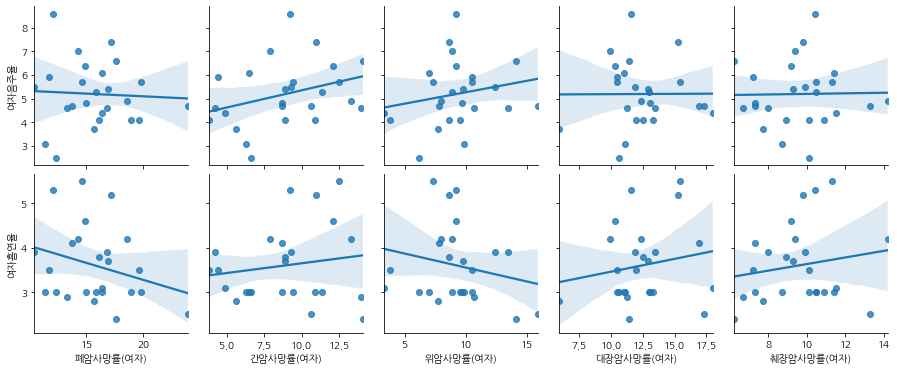

In [264]:
sns.pairplot(cancer_sex, y_vars=['여자음주율','여자흡연율'],
            x_vars=['폐암사망률(여자)','간암사망률(여자)','위암사망률(여자)','대장암사망률(여자)','췌장암사망률(여자)'],
            kind='reg')

#### 3) 흡연과 음주의 상관관계

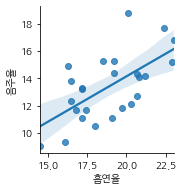

In [258]:
sns.pairplot(drink_smoke, x_vars=['흡연율'],
            y_vars=['음주율'],
            kind='reg')

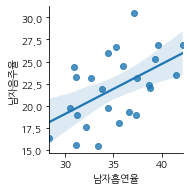

In [260]:
sns.pairplot(drink_smoke, x_vars=['남자흡연율'],
            y_vars=['남자음주율'],
            kind='reg')

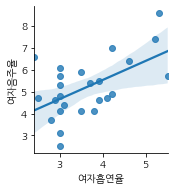

In [261]:
sns.pairplot(drink_smoke, x_vars=['여자흡연율'],
            y_vars=['여자음주율'],
            kind='reg')

Text(0.5, 1.0, '사망자비율')

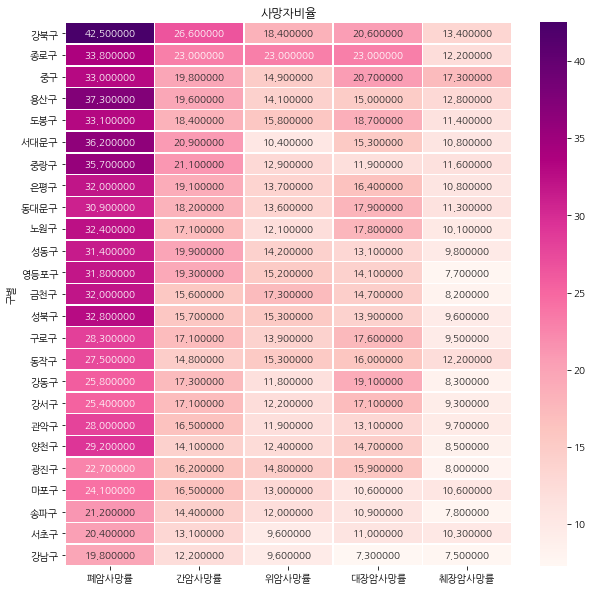

In [143]:
### 히트맵 : 정렬된 결과 확인
# 암사망률
cc_sort.head()

plt.figure(figsize=(10,10))
sns.heatmap(cc_sort[['폐암사망률','간암사망률','위암사망률',
                                 '대장암사망률','췌장암사망률']], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('사망자비율')

Text(0.5, 1.0, '남자사망자비율')

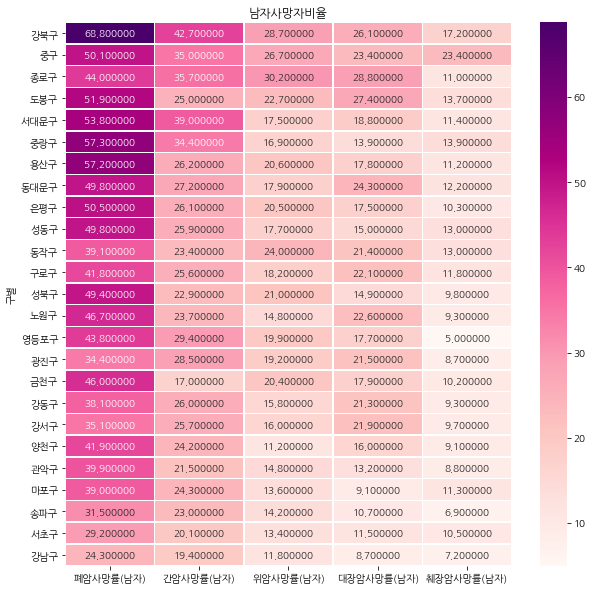

In [160]:
# 남자 암사망률
cc_male_sort = cancer_sex.sort_values(by='사망률(남자)', ascending=False)
cc_male_sort.head()

plt.figure(figsize=(10,10))
sns.heatmap(cc_male_sort[['폐암사망률(남자)','간암사망률(남자)','위암사망률(남자)',
                                 '대장암사망률(남자)','췌장암사망률(남자)']], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('남자사망자비율')

Text(0.5, 1.0, '여자사망자비율')

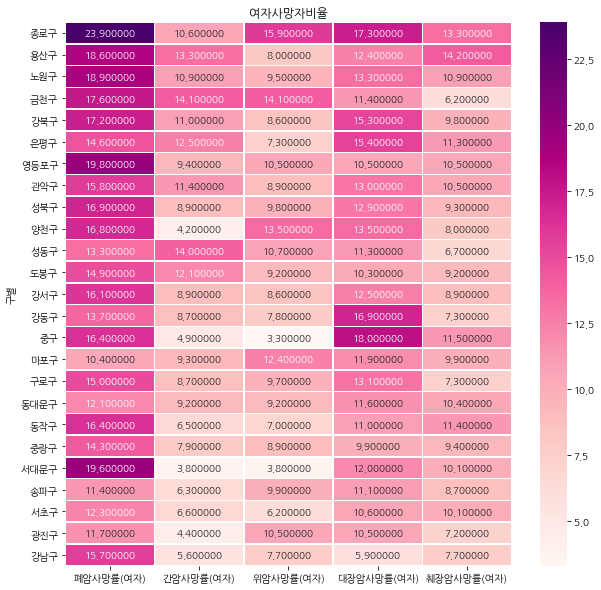

In [161]:
# 여자 암사망률
cc_female_sort = cancer_sex.sort_values(by='사망률(여자)', ascending=False)
cc_female_sort.head()

plt.figure(figsize=(10,10))
sns.heatmap(cc_female_sort[['폐암사망률(여자)','간암사망률(여자)','위암사망률(여자)',
                                 '대장암사망률(여자)','췌장암사망률(여자)']], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('여자사망자비율')

Text(0.5, 1.0, '음주흡연비율(음주기준)')

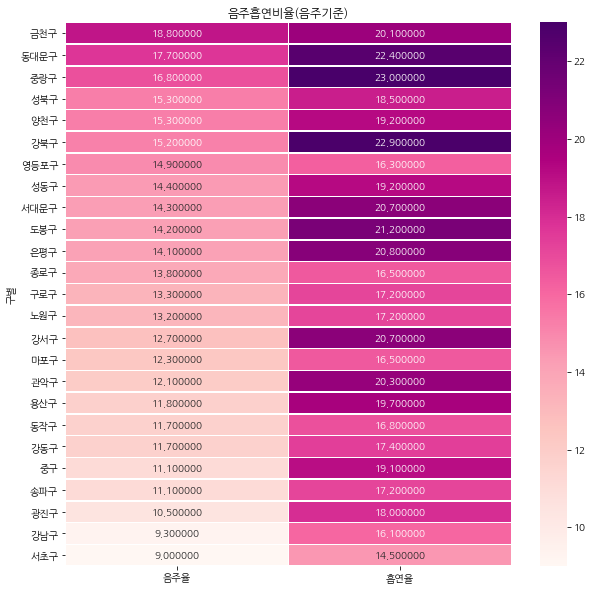

In [28]:
# 음주율
d_sort = drink_smoke.sort_values(by='음주율', ascending=False)
d_sort.head()

plt.figure(figsize=(10,10))
sns.heatmap(d_sort[['음주율','흡연율']], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('음주흡연비율(음주기준)')

Text(0.5, 1.0, '음주흡연비율(흡연기준)')

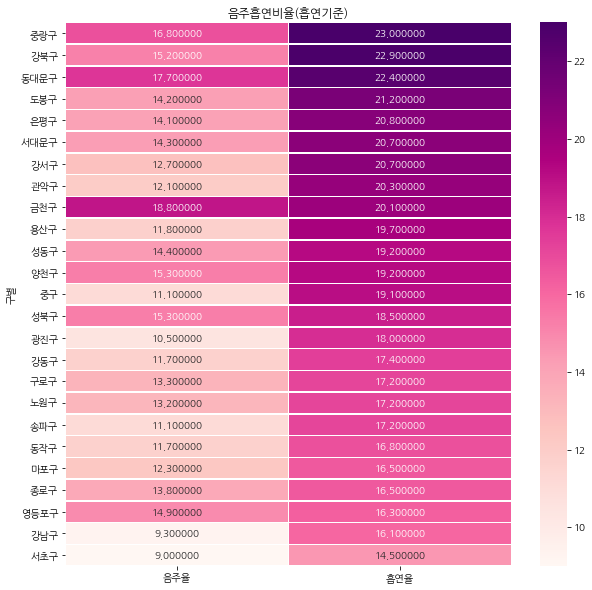

In [32]:
# 흡연율
s_sort = drink_smoke.sort_values(by='흡연율', ascending=False)
s_sort.head()

plt.figure(figsize=(10,10))
sns.heatmap(s_sort[['음주율','흡연율']], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('음주흡연비율(흡연기준)')